In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

['heart.csv']


In [7]:
df=pd.read_csv('../input/heart.csv')

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [11]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

age vs disease

In [12]:
df['age_cat']=pd.cut(df['age'], 5)

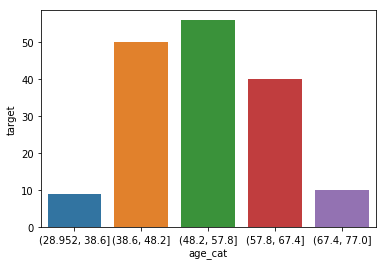

In [13]:
sns.barplot(x=df.groupby(by="age_cat").target.sum().index,y=df.groupby(by="age_cat").target.sum())

age of the people is normal in distribution

most of the patients are in range 48-59

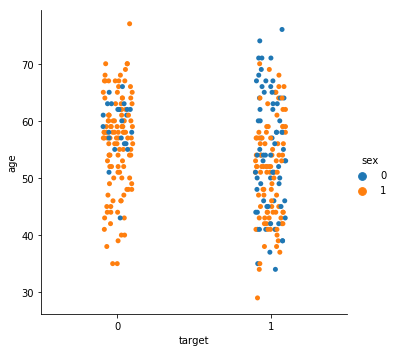

In [14]:
sns.catplot(data = df, y ="age", x = "target", hue = 'sex', sharex=False)

sex vs disease

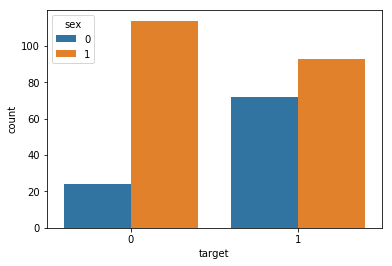

In [15]:
sns.countplot(x=df['target'],hue=df['sex'])

there are more males in the data similarly there more males that have heart disease.

But if we see proportionately, females are more suffering from heart disease

In [16]:
df['cp'].unique()

array([3, 2, 1, 0])

In [17]:
df['cp'] = df['cp'].replace(0, 'typical angina')
df['cp'] = df['cp'].replace(1, 'atypical angina')
df['cp'] = df['cp'].replace(2, 'non-anginal pain')
df['cp'] = df['cp'].replace(3, 'asymptomatic')

chestpain vs heart disease

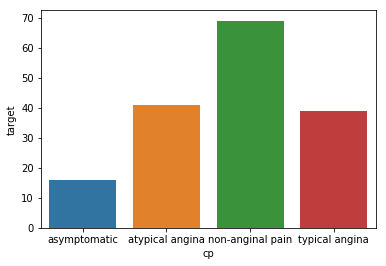

In [18]:
sns.barplot(x=df.groupby(by="cp").target.sum().index,y=df.groupby(by="cp").target.sum())

disease more observed in patients with non-anginal pain

In [19]:
df['trestbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

blood pressure at rest vs disease

In [20]:
df['bps_cat']=pd.cut(df['trestbps'], 5)

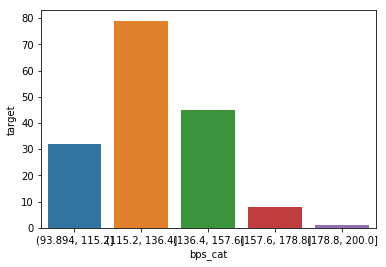

In [21]:
sns.barplot(x=df.groupby(by="bps_cat").target.sum().index,y=df.groupby(by="bps_cat").target.sum())

diseased is occurance is more in patients with rest bp at 115 - 137

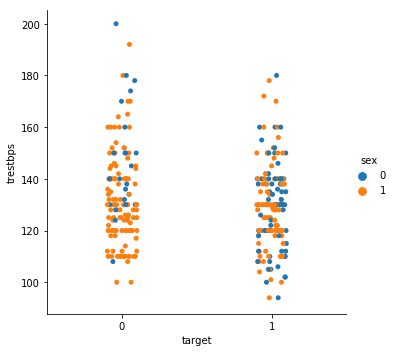

In [22]:
sns.catplot(data = df, y ="trestbps", x = "target", hue='sex' ,sharex=False)

person with hishest bp of 200 dont have heart disease

In [23]:
df['chol_cat']=pd.cut(df['chol'], 5)

cholestrol vs disease

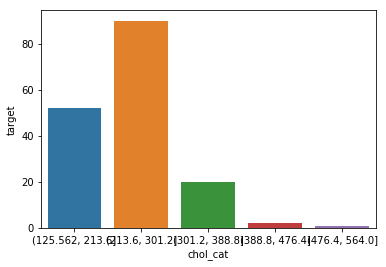

In [24]:
sns.barplot(x=df.groupby(by="chol_cat").target.sum().index,y=df.groupby(by="chol_cat").target.sum())

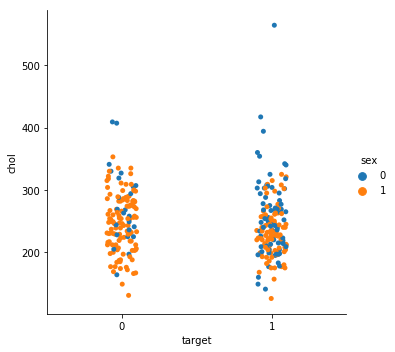

In [25]:
sns.catplot(data = df, y ="chol", x = "target", hue='sex' ,sharex=False)

there are very less people with high colestrols 

patients with cholestrol levels of 213-301 have more heart disease

fbs vs heart disease

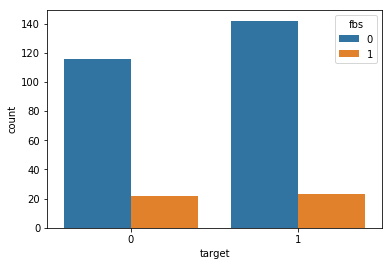

In [26]:
sns.countplot(data = df, x = "target", hue='fbs')

heart disease doesnot really depend upon fasting blood sugar

restecg vs disease

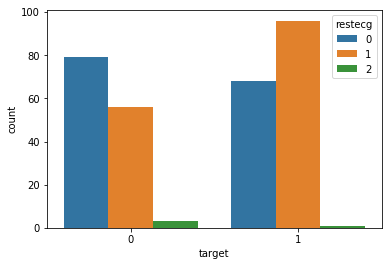

In [27]:
sns.countplot(data = df, x = "target", hue='restecg')

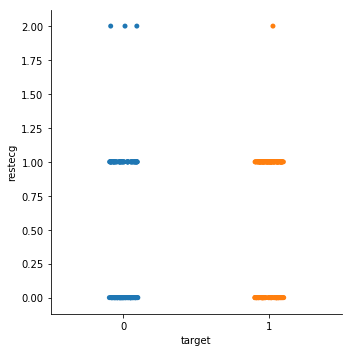

In [28]:
sns.catplot(data = df, y ="restecg", x = "target" ,sharex=False)

only 4-5 are showing probable or definite left ventricular hypertrophy by Estes' criteria from which only one person is suffering

normal ecg have few patients when compared to people with having ST-T wave abnormality

In [29]:
df['thalach_cat']=pd.cut(df['thalach'], 5)

highest heart rate reached vs disease

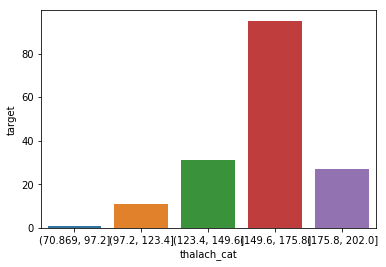

In [30]:
sns.barplot(x=df.groupby(by="thalach_cat").target.sum().index,y=df.groupby(by="thalach_cat").target.sum())

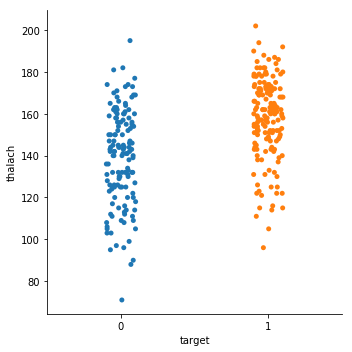

In [31]:
sns.catplot(data = df, y ="thalach", x = "target" ,sharex=False)

persons with heart rate maximum at 149 - 176 are having heart disease

exang vs disease

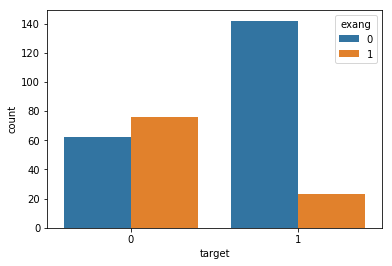

In [32]:
sns.countplot(data = df, x = "target", hue='exang')

patients with no enigma are more probably having heart disease

In [33]:
df['oldpeak_cat']=pd.cut(df['oldpeak'], 5)

old peak vs heart disease

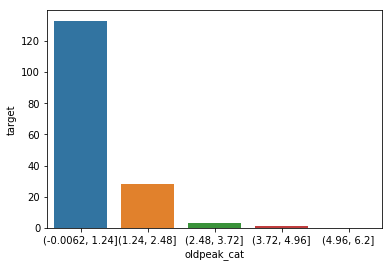

In [34]:
sns.barplot(x=df.groupby(by="oldpeak_cat").target.sum().index,y=df.groupby(by="oldpeak_cat").target.sum())

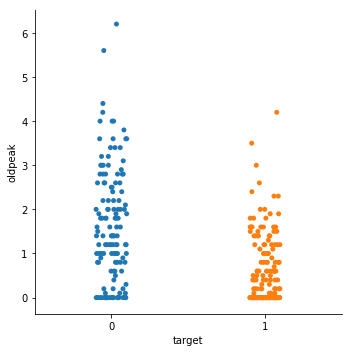

In [35]:
sns.catplot(data = df, y ="oldpeak", x = "target" ,sharex=False)

people with old peak less than 5 have suffered if thet have less than 1.25, the probability is high

In [36]:
df['slope'] = df['slope'].replace(0,'upslope')
df['slope'] = df['slope'].replace(1,'flatslope')
df['slope'] = df['slope'].replace(2,'downslope')

slope of ecg vs heart disease

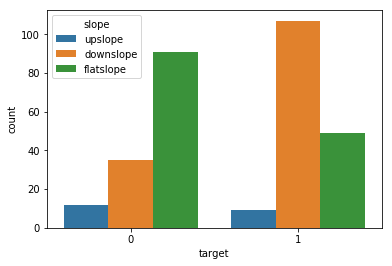

In [37]:
sns.countplot(data = df, x = "target", hue='slope')

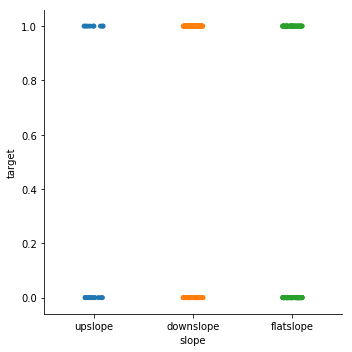

In [38]:
sns.catplot(data = df, x ="slope", y = "target" ,sharex=False)

there are few people with 0(upslope) slope, the chances are almost equal

people with 1 flatslope suffer more

people with downslope have less probability

ca vs heart disese

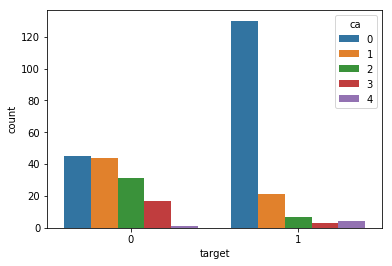

In [39]:
sns.countplot(data = df, x = "target", hue='ca')

person with 0 zeromajor vessels have high chances of heart disese

thal vs heart disese

In [40]:
df['thal'].unique()

array([1, 2, 3, 0])

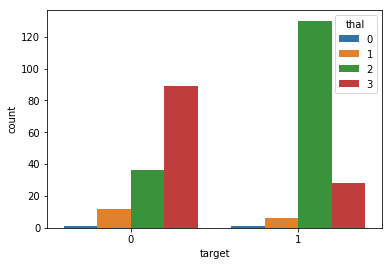

In [41]:
sns.countplot(data = df, x = "target", hue='thal')

when thal = 0 , the person is more probobly having heart disease

In [42]:
slope = pd.get_dummies(df['slope'])
slope.drop(slope.columns[[0]],axis=1,inplace=True)
df = pd.concat([df,slope],axis=1)

In [43]:
thal = pd.get_dummies(df['thal'],prefix='thal')
thal.drop(thal.columns[[0]],axis=1,inplace=True)
df = pd.concat([df,thal],axis=1)

In [44]:
del df['age_cat']
del df['bps_cat']
del df['chol_cat']
del df['thalach_cat']
del df['oldpeak_cat']

In [45]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,flatslope,upslope,thal_1,thal_2,thal_3
0,63,1,asymptomatic,145,233,1,0,150,0,2.3,upslope,0,1,1,0,1,1,0,0
1,37,1,non-anginal pain,130,250,0,1,187,0,3.5,upslope,0,2,1,0,1,0,1,0
2,41,0,atypical angina,130,204,0,0,172,0,1.4,downslope,0,2,1,0,0,0,1,0
3,56,1,atypical angina,120,236,0,1,178,0,0.8,downslope,0,2,1,0,0,0,1,0
4,57,0,typical angina,120,354,0,1,163,1,0.6,downslope,0,2,1,0,0,0,1,0


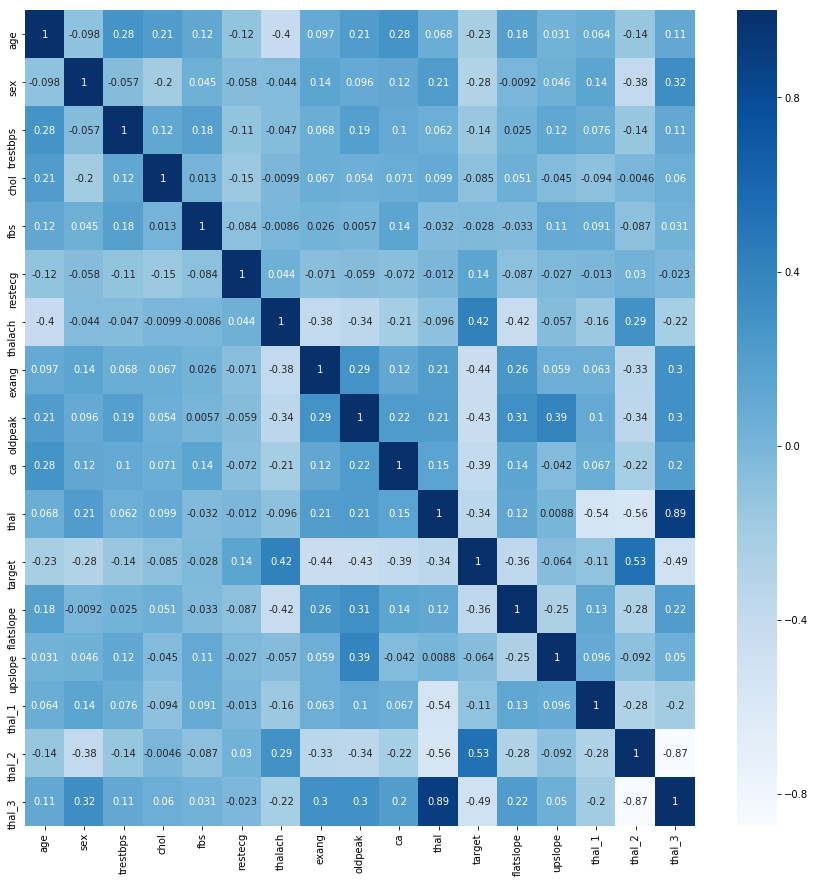

In [46]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [47]:
features = ['thal_3','thal_3','thal_1','flatslope','ca','oldpeak','exang','thalach','restecg','trestbps','sex','age']
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [48]:
def conflog(features):
    X = df[features]
    y = df.target
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=125)
    log = LogisticRegression(multi_class='auto')
    log.fit(X_train,y_train)
    y_train_pred = log.predict(X_train)   
    y_test_pred = log.predict(X_test)   
    print('for train')
    print(metrics.classification_report(y_train,y_train_pred))
    print(metrics.accuracy_score(y_train,y_train_pred))
    print('for test')
    print(metrics.classification_report(y_test,y_test_pred))
    print(metrics.accuracy_score(y_test,y_test_pred))

In [49]:
conflog(features)

for train
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       109
           1       0.86      0.89      0.88       133

   micro avg       0.86      0.86      0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242

0.8636363636363636
for test
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        29
           1       0.76      0.81      0.79        32

   micro avg       0.77      0.77      0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

0.7704918032786885


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
def confNB(features):
    X = df[features]
    y = df.target
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=125)
    nb = GaussianNB()
    nb.fit(X_train,y_train)
    y_train_pred = nb.predict(X_train)   
    y_test_pred = nb.predict(X_test)   
    print('for train')
    print(metrics.classification_report(y_train,y_train_pred))
    print(metrics.accuracy_score(y_train,y_train_pred))
    print('for test')
    print(metrics.classification_report(y_test,y_test_pred))
    print(metrics.accuracy_score(y_test,y_test_pred))

In [51]:
confNB(features)

for train
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       109
           1       0.87      0.82      0.84       133

   micro avg       0.83      0.83      0.83       242
   macro avg       0.83      0.84      0.83       242
weighted avg       0.84      0.83      0.84       242

0.8347107438016529
for test
              precision    recall  f1-score   support

           0       0.75      0.72      0.74        29
           1       0.76      0.78      0.77        32

   micro avg       0.75      0.75      0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61

0.7540983606557377


In [52]:
def confDT(features):
    X = df[features]
    y = df.target
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=125)
    dt = DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    y_train_pred = dt.predict(X_train)   
    y_test_pred = dt.predict(X_test)   
    print('for train')
    print(metrics.classification_report(y_train,y_train_pred))
    print(metrics.accuracy_score(y_train,y_train_pred))
    print('for test')
    print(metrics.classification_report(y_test,y_test_pred))
    print(metrics.accuracy_score(y_test,y_test_pred))

In [53]:
confDT(features)

for train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       133

   micro avg       1.00      1.00      1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

1.0
for test
              precision    recall  f1-score   support

           0       0.83      0.66      0.73        29
           1       0.74      0.88      0.80        32

   micro avg       0.77      0.77      0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61

0.7704918032786885


this model may not be appropriate with decision tree

In [54]:
def confSVM(features):
    X = df[features]
    y = df.target
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=125)
    svm = SVC(gamma='scale')
    svm.fit(X_train,y_train)
    y_train_pred = svm.predict(X_train)   
    y_test_pred = svm.predict(X_test)   
    print('for train')
    print(metrics.classification_report(y_train,y_train_pred))
    print(metrics.accuracy_score(y_train,y_train_pred))
    print('for test')
    print(metrics.classification_report(y_test,y_test_pred))
    print(metrics.accuracy_score(y_test,y_test_pred))

In [55]:
confSVM(features)

for train
              precision    recall  f1-score   support

           0       0.73      0.49      0.58       109
           1       0.67      0.85      0.75       133

   micro avg       0.69      0.69      0.69       242
   macro avg       0.70      0.67      0.67       242
weighted avg       0.69      0.69      0.67       242

0.6859504132231405
for test
              precision    recall  f1-score   support

           0       0.71      0.52      0.60        29
           1       0.65      0.81      0.72        32

   micro avg       0.67      0.67      0.67        61
   macro avg       0.68      0.66      0.66        61
weighted avg       0.68      0.67      0.66        61

0.6721311475409836


In [56]:
def confRF(features):
    X = df[features]
    y = df.target
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=125)
    rf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    rf.fit(X_train,y_train)
    y_train_pred = rf.predict(X_train)   
    y_test_pred = rf.predict(X_test)   
    print('for train')
    print(metrics.classification_report(y_train,y_train_pred))
    print(metrics.accuracy_score(y_train,y_train_pred))
    print('for test')
    print(metrics.classification_report(y_test,y_test_pred))
    print(metrics.accuracy_score(y_test,y_test_pred))

In [57]:
confRF(features)

for train
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       109
           1       0.85      0.89      0.87       133

   micro avg       0.86      0.86      0.86       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.86      0.85       242

0.8553719008264463
for test
              precision    recall  f1-score   support

           0       0.83      0.66      0.73        29
           1       0.74      0.88      0.80        32

   micro avg       0.77      0.77      0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61

0.7704918032786885
